Implementación de RN en Python, Redes Neuronales Artificiales (ANN)

1. Importamos librerías

In [33]:
import numpy as np  # Importación de numpy para operaciones de álgebra lineal
import pandas as pd  # Importación de pandas para procesamiento de datos, lectura y escritura de archivos CSV
import os  # Importación del módulo os para manipulación de rutas y archivos

# Iterar sobre el directorio '/input' e imprimir los nombres de los archivos
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt  # Importación de matplotlib para visualización de datos
import seaborn as sns  # Importación de seaborn para visualización estadística de datos
import datetime  # Importación de datetime para manipulación de fechas y tiempos

from sklearn.preprocessing import LabelEncoder, StandardScaler  # Importación de clases específicas de sklearn para preprocesamiento de datos
from sklearn.model_selection import train_test_split  # Importación de train_test_split para dividir datos en conjuntos de entrenamiento y prueba

from keras.layers import Dense, BatchNormalization, Dropout, LSTM  # Importación de capas específicas de Keras para construcción de modelos
from keras.models import Sequential  # Importación de Sequential para construcción de modelos secuenciales en Keras
from keras.utils import to_categorical  # Importación de to_categorical para codificación de etiquetas categóricas
from keras.optimizers import Adam  # Importación de Adam como optimizador en Keras
from tensorflow.keras import regularizers  # Importación de regularizers para regularización en Keras

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score  # Importación de métricas de evaluación específicas de sklearn para evaluar el rendimiento del modelo

from keras import callbacks  # Importación de callbacks para definir funciones a llamar en puntos específicos durante el entrenamiento

np.random.seed(0)  # Establecer la semilla para reproducibilidad de resultados


In [3]:
!pip install tensorflow


In [4]:
from tensorflow.keras import regularizers  # Importación de regularizers para regularización en Keras


2. Cargamos los datos

In [34]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd  # Importación de pandas para procesamiento de datos

ruta = '/content/drive/MyDrive/CienciaDatos/2024/M7/Data/weatherAUS.csv'
# Lectura del archivo CSV
data = pd.read_csv(ruta)

# Visualización de las primeras filas del DataFrame
data.head()




,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [36]:
# Información sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235699 entries, 0 to 235698
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           235699 non-null  object 
 1   Location       235699 non-null  object 
 2   MinTemp        231644 non-null  float64
 3   MaxTemp        231781 non-null  float64
 4   Rainfall       228600 non-null  float64
 5   Evaporation    105766 non-null  float64
 6   Sunshine       96111 non-null   float64
 7   WindGustDir    218176 non-null  object 
 8   WindGustSpeed  218287 non-null  float64
 9   WindDir9am     217222 non-null  object 
 10  WindDir3pm     225505 non-null  object 
 11  WindSpeed9am   231012 non-null  float64
 12  WindSpeed3pm   227077 non-null  float64
 13  Humidity9am    230180 non-null  float64
 14  Humidity3pm    225751 non-null  float64
 15  Pressure9am    209657 non-null  float64
 16  Pressure3pm    209681 non-null  float64
 17  Cloud9am       131699 non-nul

In [37]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,231644.000000,231781.000000,228600.000000,105766.000000,96111.000000,218287.000000,231012.000000,227077.000000,230180.000000,225751.000000,209657.000000,209681.000000,131699.000000,125989.000000,231599.000000,227075.000000,228599.000000
mean,11.978486,23.092395,2.328110,5.470664,7.615422,39.944032,14.013376,18.538183,69.155422,51.551665,1017.705060,1015.274867,4.700218,4.687219,16.808029,21.579966,2.327886
std,6.415702,7.107463,8.445496,4.189831,3.773058,13.524119,8.853658,8.697969,19.427659,21.020653,7.096872,7.046411,2.897610,2.760551,6.508398,6.967668,8.445356
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,978.600000,972.000000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,7.400000,17.800000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.000000,1010.400000,1.000000,2.000000,12.100000,16.500000,0.000000
50%,11.800000,22.500000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.600000,1015.200000,6.000000,5.000000,16.500000,21.000000,0.000000
75%,16.600000,28.000000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,84.000000,66.000000,1022.600000,1020.100000,7.000000,7.000000,21.400000,26.300000,0.600000
max,33.900000,48.900000,474.000000,138.700000,14.500000,137.000000,87.000000,87.000000,100.000000,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,48.200000,474.000000


3. Visualizamos los datos y hacemos limpieza

<ipython-input-38-628ddce0b965>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["RainTomorrow"], palette=cols)
<ipython-input-38-628ddce0b965>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


10    235699
Name: Date, dtype: int64

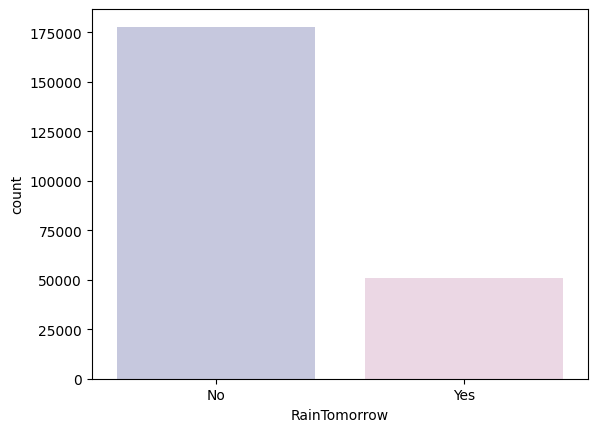

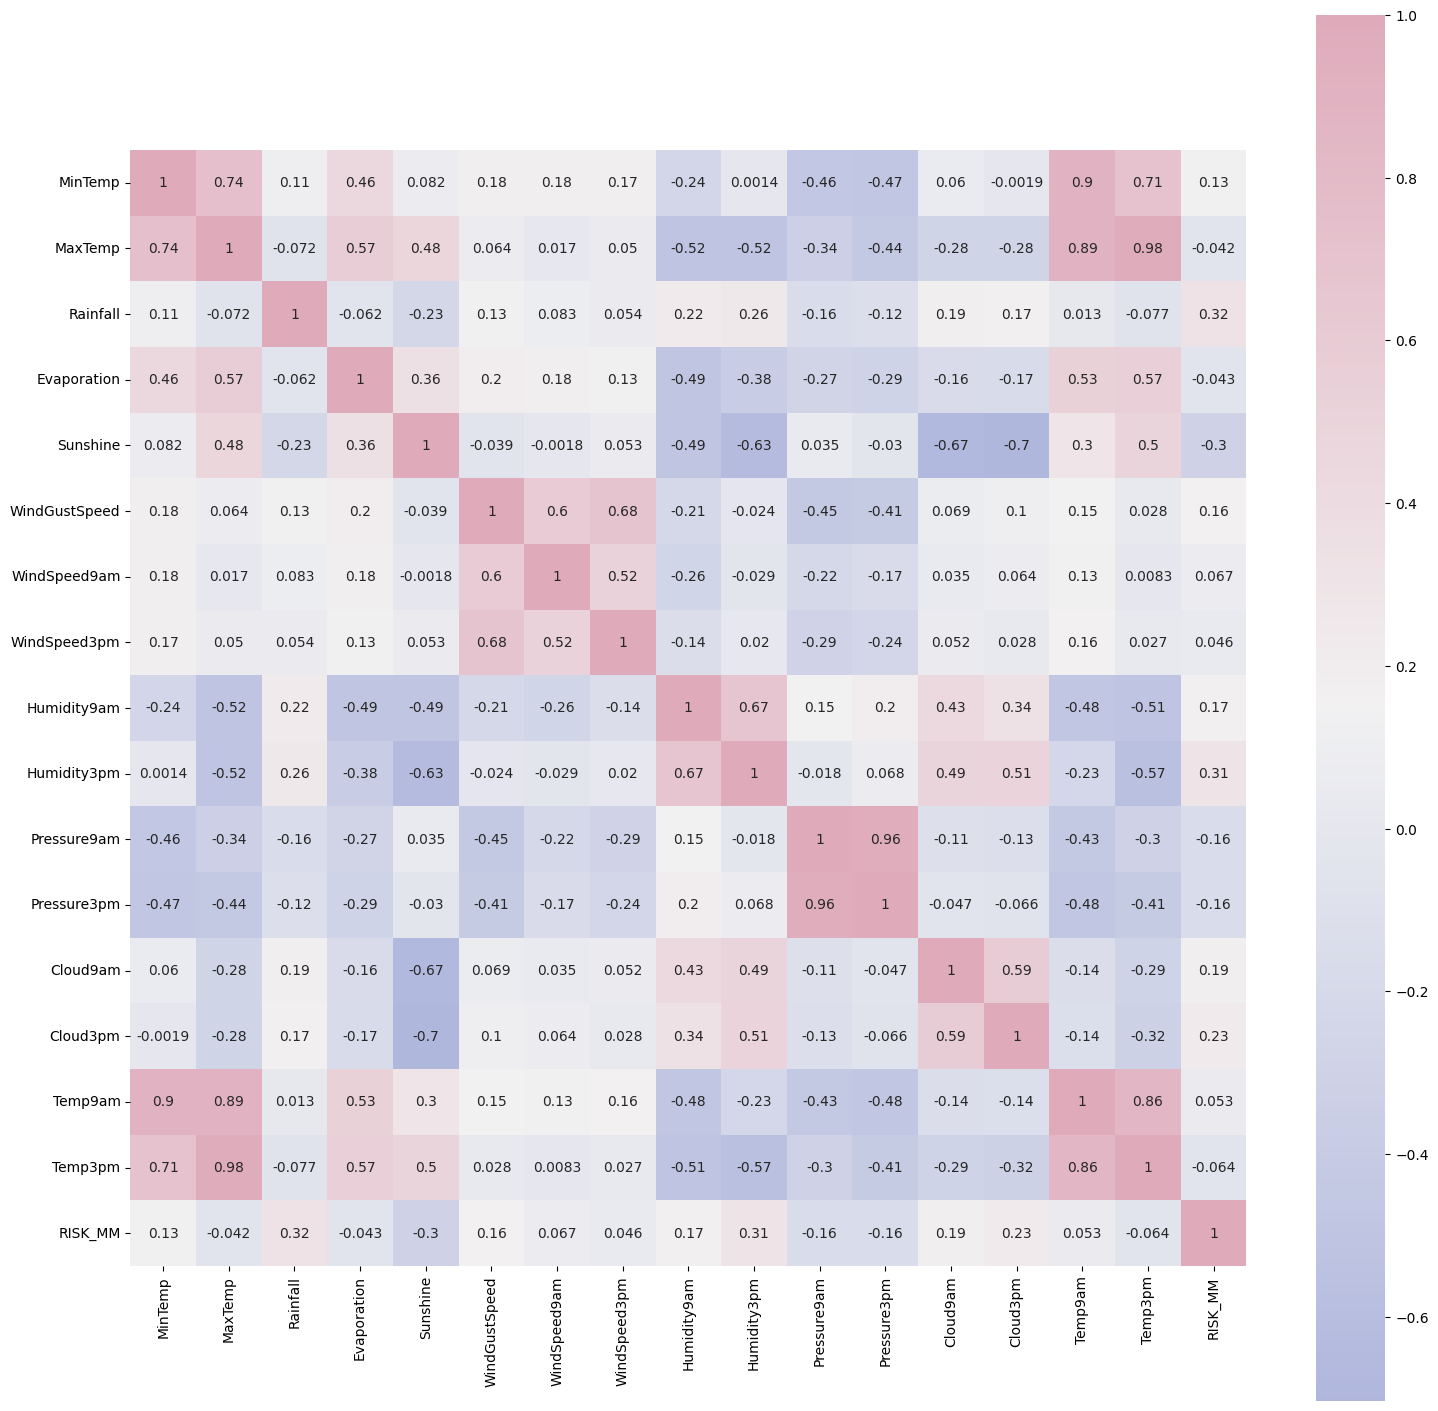

In [38]:
# Importar pandas y seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la paleta de colores para el gráfico de conteo
cols = ["#C2C4E2", "#EED4E5"]

# Graficar un countplot para la variable 'RainTomorrow' usando la paleta de colores definida
sns.countplot(x=data["RainTomorrow"], palette=cols)

# Correlación entre los atributos numéricos
corrmat = data.corr()

# Definir la paleta de colores para el heatmap
cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)

# Crear un heatmap para visualizar la correlación entre los atributos numéricos
plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)

# Exploración de la longitud de los objetos fecha
# Calcular la longitud de cada valor en la columna 'Date'
lengths = data["Date"].str.len()

# Contar los valores únicos de las longitudes y mostrarlos
lengths.value_counts()


In [39]:
# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data["Date"])

# Extraer el año de la columna 'Date' y crear una nueva columna 'year'
data['year'] = data.Date.dt.year

# Definir una función para codificar variables cíclicas (meses y días)
def encode(data, col, max_val):
    # Codificar la variable como seno y coseno
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data

# Extraer el mes de la columna 'Date' y crear nuevas columnas 'month_sin' y 'month_cos' con la codificación
data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

# Extraer el día de la columna 'Date' y crear nuevas columnas 'day_sin' y 'day_cos' con la codificación
data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

# Mostrar las primeras filas del DataFrame después de la transformación
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RISK_MM,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,No,0.0,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,No,0.0,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,No,0.0,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,No,1.0,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,No,0.2,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Día Codificado por Seno')

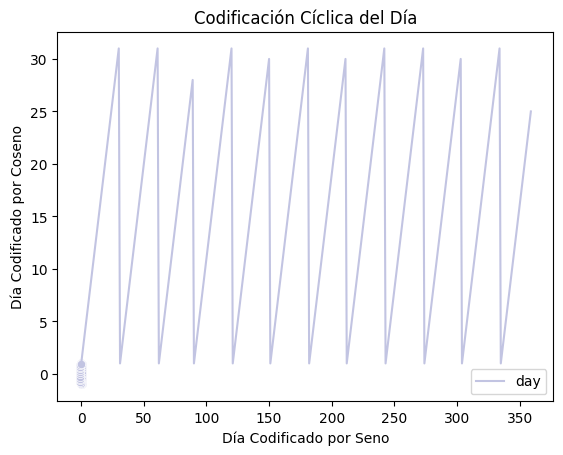

In [40]:
# Seleccionar los primeros 360 datos para visualización
section = data[:360]

# Graficar la distribución de los días a lo largo del año
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribución de los Días a lo largo del Año")
tm.set_ylabel("Días en el Mes")
tm.set_xlabel("Días en el Año")

# Graficar la codificación cíclica del mes
cyclic_month = sns.scatterplot(x="month_sin", y="month_cos", data=data, color="#C2C4E2")
cyclic_month.set_title("Codificación Cíclica del Mes")
cyclic_month.set_ylabel("Meses Codificados por Coseno")
cyclic_month.set_xlabel("Meses Codificados por Seno")

# Graficar la codificación cíclica del día
cyclic_day = sns.scatterplot(x='day_sin', y='day_cos', data=data, color="#C2C4E2")
cyclic_day.set_title("Codificación Cíclica del Día")
cyclic_day.set_ylabel("Día Codificado por Coseno")
cyclic_day.set_xlabel("Día Codificado por Seno")



In [41]:
# Identificar variables categóricas y contar valores perdidos
s = (data.dtypes == "object")
object_cols = list(s[s].index)
print("Variables categóricas:")
print(object_cols)
for i in object_cols:
    print(i, data[i].isnull().sum())
    # Llenar valores perdidos con la moda
    data[i].fillna(data[i].mode()[0], inplace=True)

# Identificar variables numéricas y contar valores perdidos
t = (data.dtypes == "float64")
num_cols = list(t[t].index)
print("Variables numéricas:")
print(num_cols)


Variables categóricas:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Location 0
WindGustDir 17523
WindDir9am 18477
WindDir3pm 10194
RainToday 7099
RainTomorrow 7100
Variables numéricas:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [42]:
# Contar valores perdidos en variables numéricas
for i in num_cols:
    print(i, data[i].isnull().sum())

# Llenar valores perdidos en variables numéricas con la mediana
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

# Mostrar información sobre el DataFrame después de llenar valores perdidos
data.info()

MinTemp 4055
MaxTemp 3918
Rainfall 7099
Evaporation 129933
Sunshine 139588
WindGustSpeed 17412
WindSpeed9am 4687
WindSpeed3pm 8622
Humidity9am 5519
Humidity3pm 9948
Pressure9am 26042
Pressure3pm 26018
Cloud9am 104000
Cloud3pm 109710
Temp9am 4100
Temp3pm 8624
RISK_MM 7100
month_sin 0
month_cos 0
day_sin 0
day_cos 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235699 entries, 0 to 235698
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           235699 non-null  datetime64[ns]
 1   Location       235699 non-null  object        
 2   MinTemp        235699 non-null  float64       
 3   MaxTemp        235699 non-null  float64       
 4   Rainfall       235699 non-null  float64       
 5   Evaporation    235699 non-null  float64       
 6   Sunshine       235699 non-null  float64       
 7   WindGustDir    235699 non-null  object        
 8   WindGustSpeed  235699 non-null  float64       
 

<ipython-input-43-57c40fe52626>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  Days_of_week = sns.barplot(x=data['Date'].dt.year, y="WindGustSpeed", data=data, ci=None, palette=colours)
<ipython-input-43-57c40fe52626>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Days_of_week = sns.barplot(x=data['Date'].dt.year, y="WindGustSpeed", data=data, ci=None, palette=colours)
<ipython-input-43-57c40fe52626>:11: UserWarning: 
The palette list has fewer values (5) than needed (17) and will cycle, which may produce an uninterpretable plot.
  Days_of_week = sns.barplot(x=data['Date'].dt.year, y="WindGustSpeed", data=data, ci=None, palette=colours)


Text(0.5, 0, 'Año')

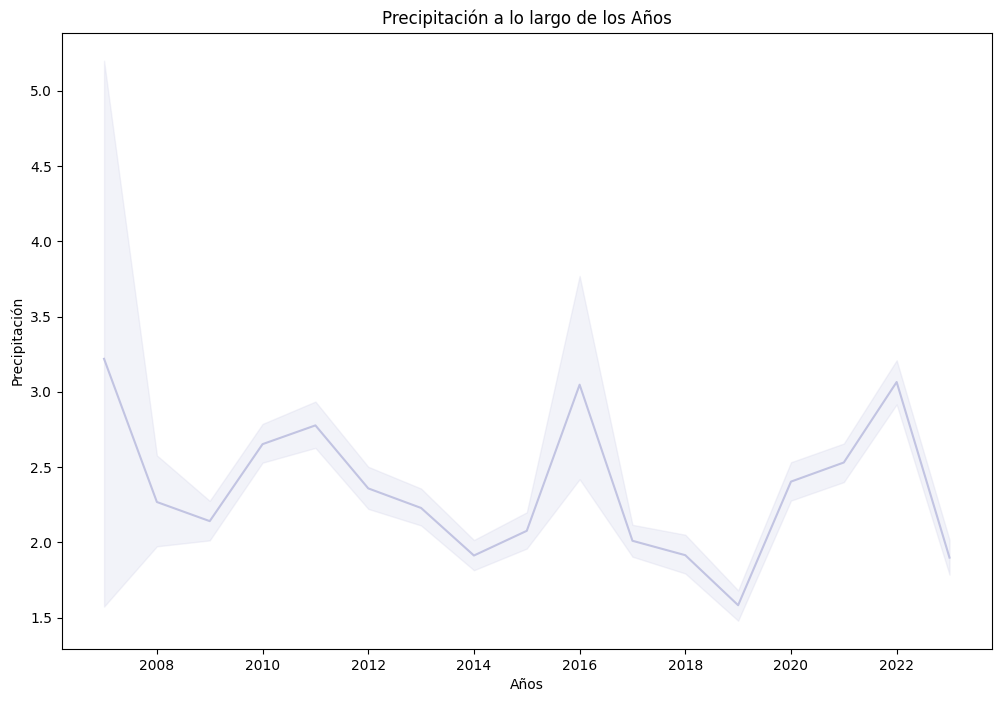

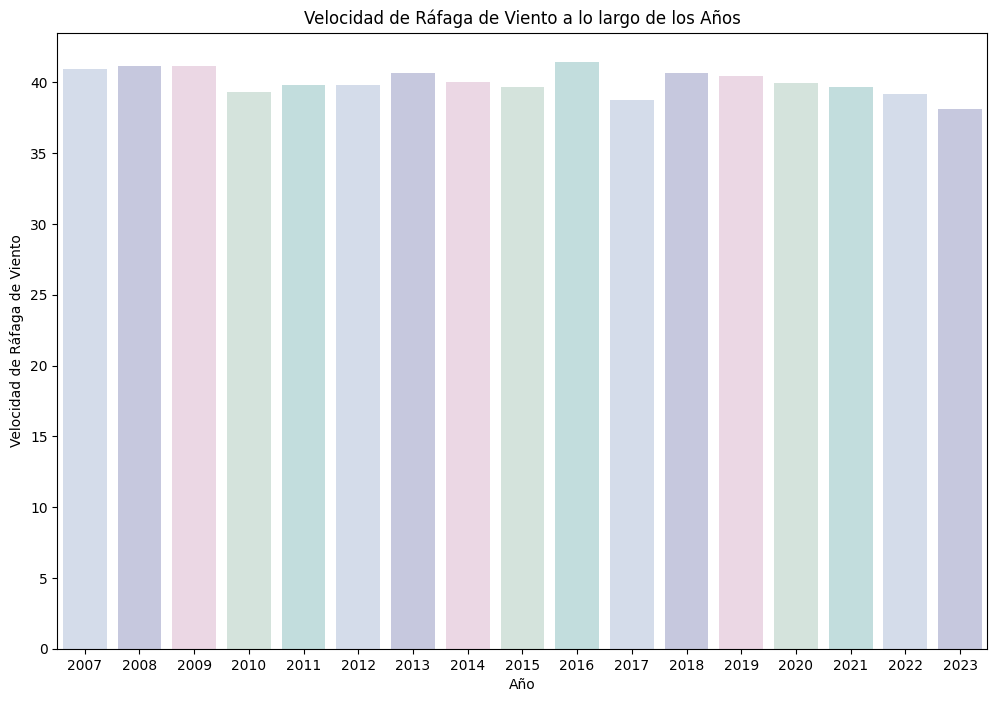

In [43]:


# Graficar la serie temporal de la precipitación
plt.figure(figsize=(12, 8))
Time_series = sns.lineplot(x=data['Date'].dt.year, y="Rainfall", data=data, color="#C2C4E2")
Time_series.set_title("Precipitación a lo largo de los Años")
Time_series.set_ylabel("Precipitación")
Time_series.set_xlabel("Años")

# Graficar la velocidad del viento en función del tiempo
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(12, 8))
Days_of_week = sns.barplot(x=data['Date'].dt.year, y="WindGustSpeed", data=data, ci=None, palette=colours)
Days_of_week.set_title("Velocidad de Ráfaga de Viento a lo largo de los Años")
Days_of_week.set_ylabel("Velocidad de Ráfaga de Viento")
Days_of_week.set_xlabel("Año")


4. Preprocesamos los datos

In [44]:
# Aplicar label encoder a cada columna con datos categóricos
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])

# Mostrar información sobre el DataFrame después de aplicar el label encoder
data.info()

# Preparación de atributos: eliminar columnas no necesarias
features = data.drop(['RainTomorrow', 'Date', 'day', 'month'], axis=1)
# Eliminar las columnas 'RainTomorrow', 'Date', 'day' y 'month' del DataFrame para obtener solo los atributos
# 'RainTomorrow' es el objetivo (variable dependiente), 'Date' es una columna de fecha, y 'day' y 'month' son columnas cíclicas codificadas
# Axis=1 indica que estamos eliminando columnas (0 sería para filas)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235699 entries, 0 to 235698
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           235699 non-null  datetime64[ns]
 1   Location       235699 non-null  int64         
 2   MinTemp        235699 non-null  float64       
 3   MaxTemp        235699 non-null  float64       
 4   Rainfall       235699 non-null  float64       
 5   Evaporation    235699 non-null  float64       
 6   Sunshine       235699 non-null  float64       
 7   WindGustDir    235699 non-null  int64         
 8   WindGustSpeed  235699 non-null  float64       
 9   WindDir9am     235699 non-null  int64         
 10  WindDir3pm     235699 non-null  int64         
 11  WindSpeed9am   235699 non-null  float64       
 12  WindSpeed3pm   235699 non-null  float64       
 13  Humidity9am    235699 non-null  float64       
 14  Humidity3pm    235699 non-null  float64       
 15  

In [45]:
from sklearn import preprocessing


In [46]:
# Definir la variable objetivo 'RainTomorrow'
target = data['RainTomorrow']

# Obtener los nombres de las columnas de los atributos
col_names = list(features.columns)

# Estandarizar los atributos usando StandardScaler
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)  # Convertir los atributos estandarizados a un DataFrame

# Describir estadísticas resumidas de los atributos
features.describe().T



,count,mean,std,min,25%,50%,75%,max
Location,235699.0,-5.209262e-17,1.000002,-1.694343,-0.846447,0.001449,0.849344,1.697240
MinTemp,235699.0,2.701099e-17,1.000002,-3.250696,-0.703648,-0.027580,0.711379,3.447097
MaxTemp,235699.0,-9.646782e-17,1.000002,-3.856482,-0.735266,-0.082648,0.683469,3.662812
Rainfall,235699.0,-5.498665e-17,1.000002,-0.271170,-0.271170,-0.271170,-0.199114,56.653232
Evaporation,235699.0,7.379788e-17,1.000002,-1.804748,-0.106478,-0.106478,-0.106478,47.268195
Sunshine,235699.0,6.579105e-16,1.000002,-3.324542,0.147332,0.147332,0.147332,2.598067
WindGustDir,235699.0,-3.858713e-17,1.000002,-1.718957,-0.868725,0.194065,1.044297,1.469413
WindGustSpeed,235699.0,1.707480e-16,1.000002,-2.909533,-0.681730,-0.067164,0.470582,7.461274
WindDir9am,235699.0,-3.858713e-17,1.000002,-1.539109,-0.876186,0.007710,0.891607,1.775503
WindDir3pm,235699.0,-6.173940e-17,1.000002,-1.726390,-0.841375,0.043641,0.928656,1.592418


<ipython-input-47-159016cd2fbc>:4: UserWarning: 
The palette list has fewer values (5) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data=features, palette=colours)


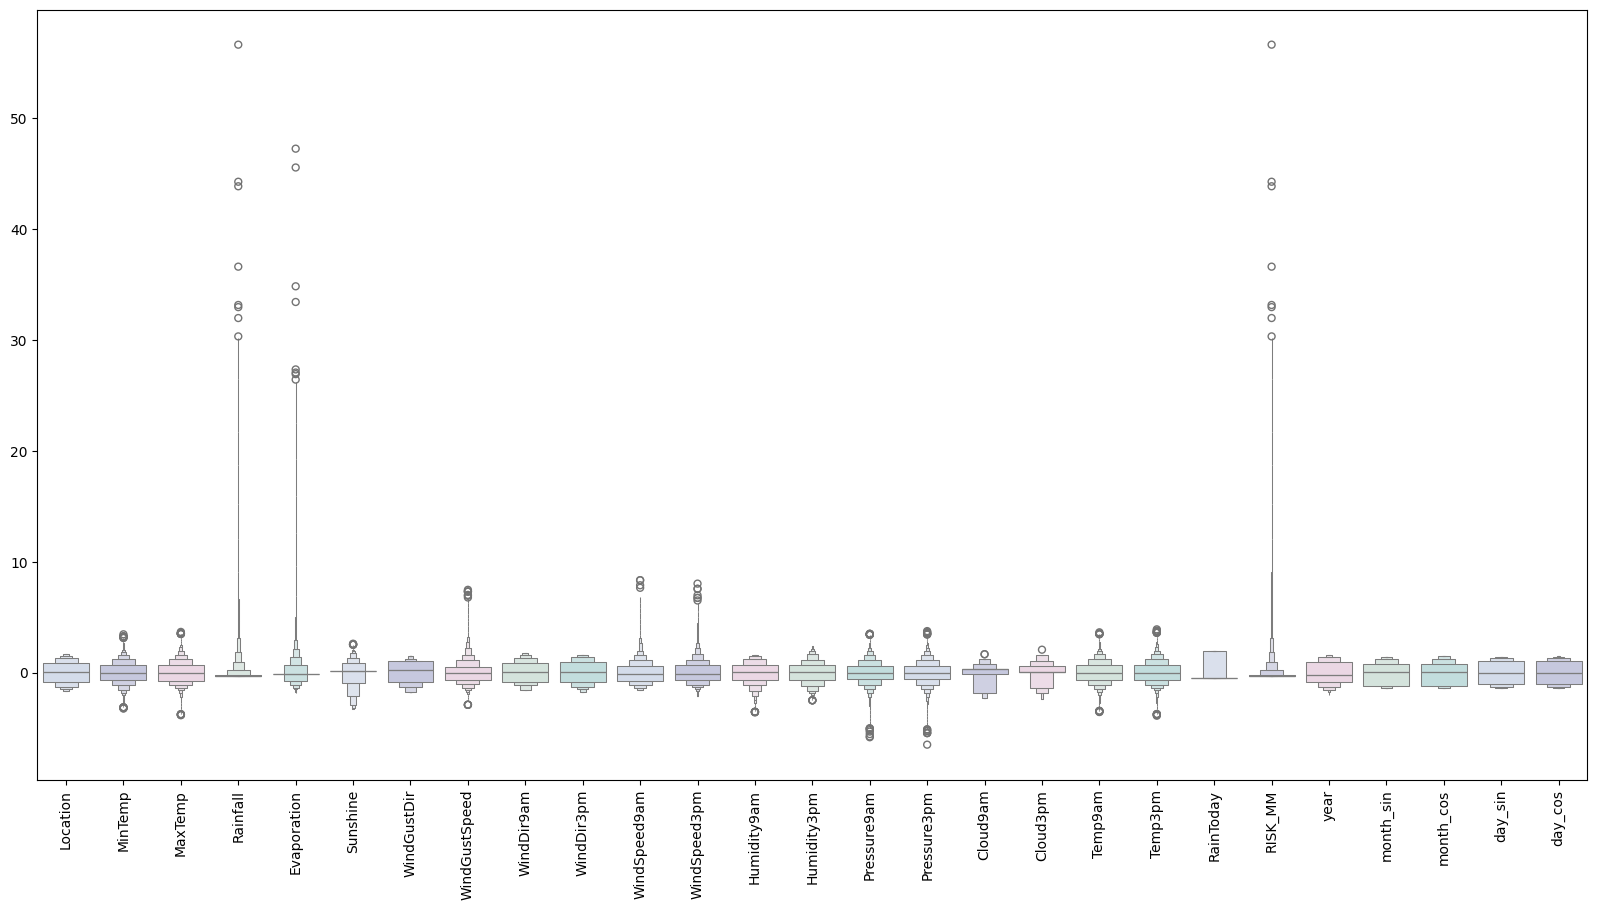

In [47]:

# Detección de outliers
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20, 10))
sns.boxenplot(data=features, palette=colours)
plt.xticks(rotation=90)
plt.show()

In [48]:


# Eliminar outliers en cada atributo
features["RainTomorrow"] = target
features = features[(features["MinTemp"] < 2.3) & (features["MinTemp"] > -2.3)]
features = features[(features["MaxTemp"] < 2.3) & (features["MaxTemp"] > -2)]
features = features[(features["Rainfall"] < 4.5)]
features = features[(features["Evaporation"] < 2.8)]
features = features[(features["Sunshine"] < 2.1)]
features = features[(features["WindGustSpeed"] < 4) & (features["WindGustSpeed"] > -4)]
features = features[(features["WindSpeed9am"] < 4)]
features = features[(features["WindSpeed3pm"] < 2.5)]
features = features[(features["Humidity9am"] > -3)]
features = features[(features["Humidity3pm"] > -2.2)]
features = features[(features["Pressure9am"] < 2) & (features["Pressure9am"] > -2.7)]
features = features[(features["Pressure3pm"] < 2) & (features["Pressure3pm"] > -2.7)]
features = features[(features["Cloud9am"] < 1.8)]
features = features[(features["Cloud3pm"] < 2)]
features = features[(features["Temp9am"] < 2.3) & (features["Temp9am"] > -2)]
features = features[(features["Temp3pm"] < 2.3) & (features["Temp3pm"] > -2)]

# Imprimir la forma de los datos después de eliminar outliers
features.shape


(205711, 28)

<ipython-input-49-6296bf200699>:3: UserWarning: 
The palette list has fewer values (5) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data=features, palette=colours)


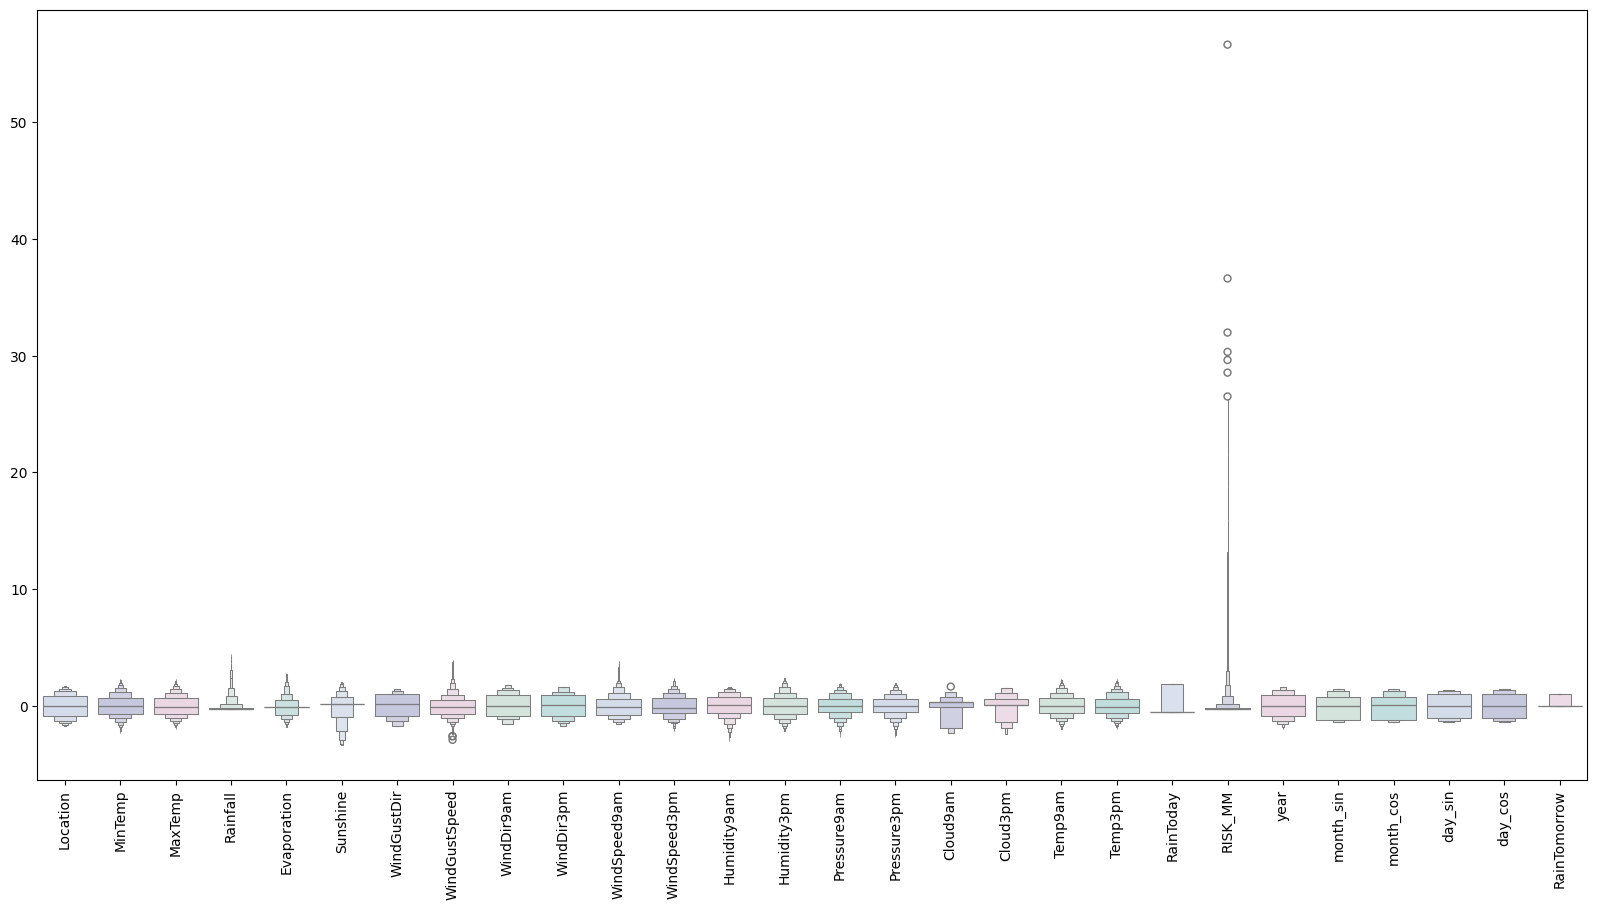

In [49]:
# Revisión de atributos escalados sin outliers
plt.figure(figsize=(20, 10))
sns.boxenplot(data=features, palette=colours)
plt.xticks(rotation=90)
plt.show()


5. Construimos el modelo

In [50]:
# División del conjunto de datos en atributos (X) y variable objetivo (y)
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# División del conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forma de los atributos
X.shape

# Detención temprana para evitar sobreajuste
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,  # Diferencia mínima para considerar como mejora
    patience=20,      # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True,  # Restaurar los pesos del modelo que obtuvieron la mejor precisión
)

# Definición del modelo de red neuronal secuencial
model = Sequential()
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=26))
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))  # Dropout para evitar el sobreajuste
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))  # Dropout para evitar el sobreajuste
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))  # Capa de salida con activación sigmoide para clasificación binaria


In [54]:
# Imprimir la forma de los datos de entrenamiento
print("Forma de X_train:", X_train.shape)

# Imprimir la forma de la capa de entrada del modelo
print("Forma de la capa de entrada del modelo:", model.layers[0].input_shape)


Forma de X_train: (164568, 27)
Forma de la capa de entrada del modelo: (None, 26)


In [55]:
# Modificar la capa de entrada del modelo para aceptar 27 características
model = Sequential()
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=27))  # Cambiar input_dim a 27
# Añadir el resto de las capas ocultas y la capa de salida según sea necesario


In [56]:
# Compilación de la ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento de la ANN con detención temprana y validación cruzada
history = model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/150
4115/4115 [==============================] - 13s 3ms/step - loss: 1.1283 - accuracy: 0.0493 - val_loss: 0.7545 - val_accuracy: 0.0627
Epoch 2/150
4115/4115 [==============================] - 10s 2ms/step - loss: 0.6208 - accuracy: 0.1047 - val_loss: 0.5163 - val_accuracy: 0.1213
Epoch 3/150
4115/4115 [==============================] - 8s 2ms/step - loss: 0.4588 - accuracy: 0.1482 - val_loss: 0.4030 - val_accuracy: 0.1718
Epoch 4/150
4115/4115 [==============================] - 9s 2ms/step - loss: 0.3644 - accuracy: 0.1867 - val_loss: 0.3254 - val_accuracy: 0.1836
Epoch 5/150
4115/4115 [==============================] - 9s 2ms/step - loss: 0.2981 - accuracy: 0.1741 - val_loss: 0.2665 - val_accuracy: 0.1679
Epoch 6/150
4115/4115 [==============================] - 8s 2ms/step - loss: 0.2438 - accuracy: 0.1796 - val_loss: 0.2187 - val_accuracy: 0.1914
Epoch 7/150
4115/4115 [==============================] - 9s 2ms/step - loss: 0.2006 - accuracy: 0.2111 - val_loss: 0.1807 - val_

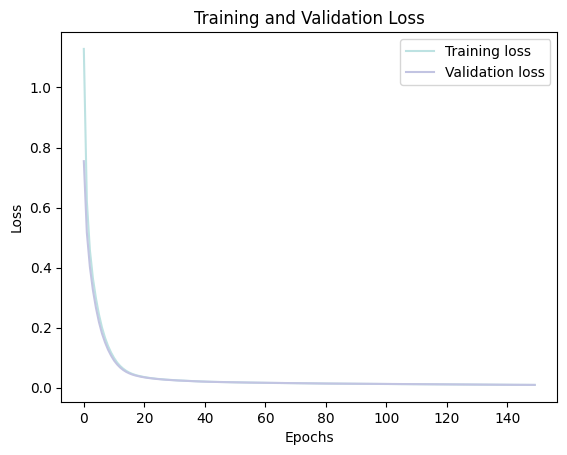

In [57]:

# Graficar pérdida de entrenamiento y validación respecto de las epochs
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], "#C2C4E2", label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()




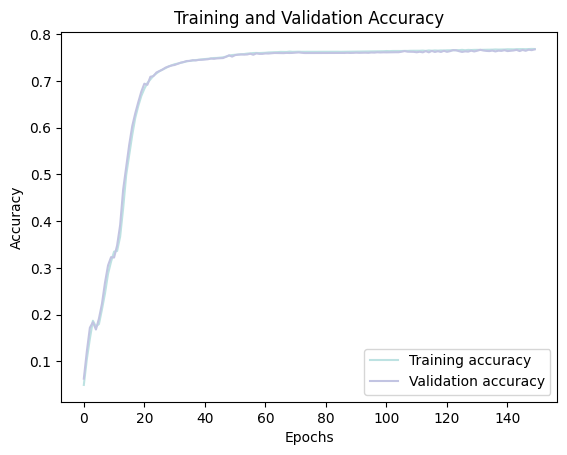

In [58]:


# Graficar exactitud de entrenamiento y validación respecto de las epochs
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [94]:
# Realizamos predicciones
y_pred = model.predict(X_test)

1286/1286 [==============================] - 2s 2ms/step


In [95]:
# Verificar las formas de y_test y y_pred
print("Forma de y_test:", y_test.shape)
print("Forma de y_pred:", y_pred.shape)

# Verificar valores únicos en y_test y y_pred
print("Valores únicos en y_test:", np.unique(y_test))
print("Valores únicos en y_pred:", np.unique(y_pred))


Forma de y_test: (41143,)
Forma de y_pred: (41143, 32)
Valores únicos en y_test: [0 1]
Valores únicos en y_pred: [0.0000000e+00 4.7683716e-07 9.5367432e-07 ... 2.8362915e+02 2.8411447e+02
 2.8414932e+02]


In [96]:
# Mostrar el resumen de la arquitectura del modelo
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                896       
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
# Verificar la forma y los valores únicos de y_pred
print("Forma de y_pred antes de la corrección:", y_pred.shape)
print("Valores únicos en y_pred antes de la corrección:", np.unique(y_pred))

# Corregir las predicciones para que sean binarias (0 o 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Verificar la forma y los valores únicos de las predicciones corregidas
print("Forma de y_pred después de la corrección:", y_pred_binary.shape)
print("Valores únicos en y_pred después de la corrección:", np.unique(y_pred_binary))


Forma de y_pred antes de la corrección: (41143, 32)
Valores únicos en y_pred antes de la corrección: [0.0000000e+00 4.7683716e-07 9.5367432e-07 ... 2.8362915e+02 2.8411447e+02
 2.8414932e+02]
Forma de y_pred después de la corrección: (41143, 32)
Valores únicos en y_pred después de la corrección: [0 1]


In [98]:
# Convertimos las probabilidades en clases (0 o 1) usando un umbral de 0.5
print(np.unique(y_pred))

[0.0000000e+00 4.7683716e-07 9.5367432e-07 ... 2.8362915e+02 2.8411447e+02
 2.8414932e+02]


In [99]:
y_pred = y_pred_binary

In [100]:
print(np.unique(y_pred))

[0 1]


In [101]:
# Verificar los tipos de datos
print("Tipo de datos de y_test:", type(y_test))
print("Tipo de datos de y_pred:", type(y_pred))

# Verificar los valores únicos
print("Valores únicos en y_test:", np.unique(y_test))
print("Valores únicos en y_pred:", np.unique(y_pred))



Tipo de datos de y_test: <class 'pandas.core.series.Series'>
Tipo de datos de y_pred: <class 'numpy.ndarray'>
Valores únicos en y_test: [0 1]
Valores únicos en y_pred: [0 1]


In [102]:
# Verificar la forma de X_test e y_test
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

# Verificar la correspondencia entre X_test e y_test
# Imprimir algunas muestras de X_test y sus correspondientes objetivos en y_test
print("Muestras en X_test:")
print(X_test.head())
print("\nObjetivos correspondientes en y_test:")
print(y_test.head())


Forma de X_test: (41143, 27)
Forma de y_test: (41143,)
Muestras en X_test:
        Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
75861  -1.058421 -0.735093  0.655094 -0.271170    -0.106478  0.147332   
234517  1.202634 -0.939486 -0.437332 -0.271170    -0.106478  0.147332   
219431 -1.482369  0.711379  0.768593  1.986591     1.874838  0.310714   
13624  -0.987763  0.538431  0.938841 -0.271170    -0.106478  0.147332   
37503   0.213422  0.035310 -0.792015 -0.271170    -0.531045  0.147332   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Cloud3pm  \
75861     -0.231051      -0.220805    0.007710   -1.062629  ...  1.070588   
234517    -1.718957       0.316940   -1.539109   -1.505136  ...  0.082592   
219431    -1.718957       0.086478   -1.097160   -1.726390  ... -0.411405   
13624     -0.018493      -1.373117   -1.539109    1.371164  ...  0.082592   
37503     -0.018493      -1.219476   -1.097160    0.486149  ...  0.082592   

         Temp9am   Temp

In [103]:
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)
print("Forma de y_pred:", y_pred.shape)


Forma de X_test: (41143, 27)
Forma de y_test: (41143,)
Forma de y_pred: (41143, 32)


In [104]:
# Realizar predicciones
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Verificar las formas de y_test y y_pred
print("Forma de y_test:", y_test.shape)
print("Forma de y_pred:", y_pred.shape)

# Verificar valores únicos en y_test y y_pred
print("Valores únicos en y_test:", np.unique(y_test))
print("Valores únicos en y_pred:", np.unique(y_pred))

1286/1286 [==============================] - 5s 4ms/step
Forma de y_test: (41143,)
Forma de y_pred: (41143, 32)
Valores únicos en y_test: [0 1]
Valores únicos en y_pred: [0 1]


In [105]:
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)
print("Forma de y_pred:", y_pred.shape)


Forma de X_test: (41143, 27)
Forma de y_test: (41143,)
Forma de y_pred: (41143, 32)


In [111]:
# Convertir las probabilidades en etiquetas binarias
y_pred_binary = (y_pred[:, 0] > 0.5).astype(int)

In [124]:
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)
print("Forma de y_pred:", y_pred.shape)
print("Forma de y_pred_binary:", y_pred_binary.shape)


Forma de X_test: (41143, 27)
Forma de y_test: (41143,)
Forma de y_pred: (41143, 32)
Forma de y_pred_binary: (41143,)


Predicciones...

In [120]:
# Realizamos predicciones
y_pred = model.predict(X_test)

1286/1286 [==============================] - 3s 3ms/step


In [121]:
# Convertir las probabilidades en etiquetas binarias
y_pred_binary = (y_pred[:, 0] > 0.5).astype(int)

In [122]:
print("Forma de y_pred:", y_pred.shape)
print("Forma de y_pred_binary:", y_pred_binary.shape)

Forma de y_pred: (41143, 32)
Forma de y_pred_binary: (41143,)


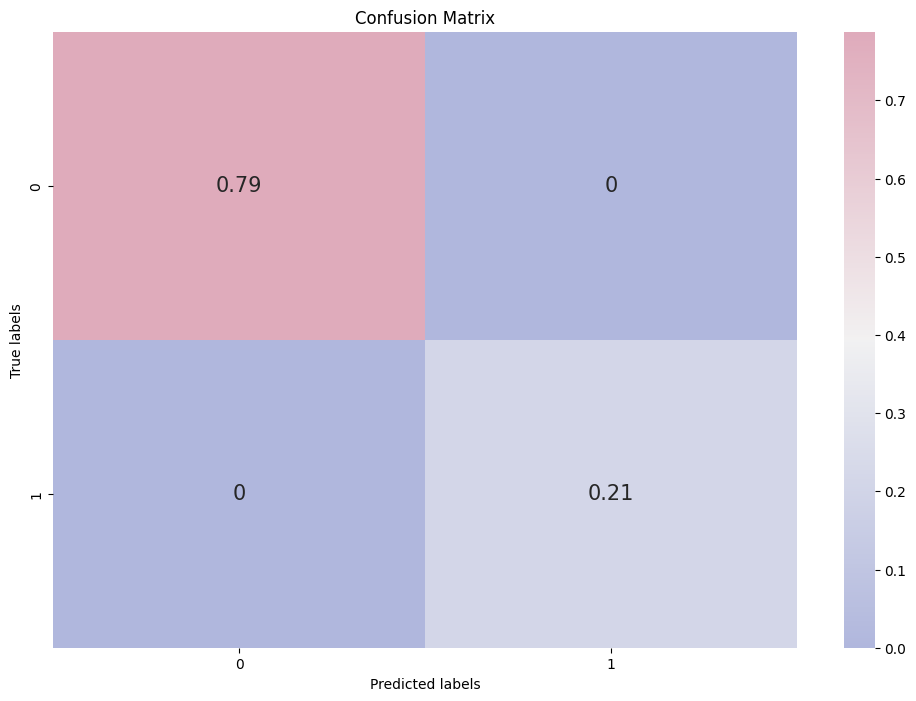

In [113]:


# Crear la matriz de confusión
cmap1 = sns.diverging_palette(260, -10, s=50, l=75, n=5, as_cmap=True)

cf_matrix = confusion_matrix(y_test, y_pred_binary)

# Visualizar la matriz de confusión como un heatmap
plt.subplots(figsize=(12, 8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap1, annot=True, annot_kws={'size': 15})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [119]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32408
           1       1.00      1.00      1.00      8735

    accuracy                           1.00     41143
   macro avg       1.00      1.00      1.00     41143
weighted avg       1.00      1.00      1.00     41143



In [78]:
from sklearn.metrics import classification_report
